flechas8
Conjunto de datos de imágenes binarias de 8x8 píxeles con flechas direccionales

Acerca del conjunto de datos
Este conjunto de datos de clasificación de imágenes contiene 12 391 imágenes binarias (0 o 1) de flechas de 8 x 8 píxeles, guardadas en formato .npz, divididas en tres partes. El conjunto de datos contiene cuatro clases de flechas: arriba, izquierda, abajo y derecha.

El conjunto de datos es adecuado para su uso con redes binarias muy pequeñas, como en la evaluación de hardware neuromórfico novedoso. Se logran altas tasas de clasificación (>95%) con redes de propagación hacia adelante de dos capas y un número reducido de neuronas en la capa oculta.

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.model_selection import train_test_split

In [ ]:
data = np.load('arrows8_keras_format.npz')
x_train = data['x_train']
y_train = data['y_train']

In [19]:
# Cargar el conjunto de datos
data = np.load('arrows8_keras_format.npz')
x_train = data['x_train']
y_train = data['y_train']

# Verificar las dimensiones del conjunto de entrenamiento
print("El conjunto de datos para entrenamiento contiene %d ejemplos con %d características" % 
      (x_train.shape[0], x_train.shape[1]))

# Verificar si existen los conjuntos de validación y prueba
if 'x_validation' in data and 'x_test' in data:
    x_validation = data['x_validation']
    x_test = data['x_test']

    print("El conjunto de datos para validación contiene %d ejemplos con %d características" % 
          (x_validation.shape[0], x_validation.shape[1]))
    print("El conjunto de datos para prueba contiene %d ejemplos con %d características" % 
          (x_test.shape[0], x_test.shape[1]))
else:
    print("Los conjuntos de validación y prueba no están disponibles en el archivo.")

El conjunto de datos para entrenamiento contiene 4274 ejemplos con 8 características
Los conjuntos de validación y prueba no están disponibles en el archivo.


In [ ]:
# Generar/asegurar conjuntos de validación y prueba
# Usa los arrays ya cargados (data, x_train, y_train, x_train_flat) cuando sea posible.

# Si el archivo .npz ya contiene x_val/y_val/x_test/y_test, los usamos
if all(k in data for k in ('x_val', 'y_val', 'x_test', 'y_test')):
    x_val = data['x_val']
    y_val = pd.Series(data['y_val'], dtype='int32', name='label')
    x_test = data['x_test']
    y_test = pd.Series(data['y_test'], dtype='int32', name='label')

    # versiones "planas" (64 features) para modelos que las necesiten
    x_val_flat = x_val.reshape((x_val.shape[0], -1))
    x_test_flat = x_test.reshape((x_test.shape[0], -1))

    print(f"Usando validación/prueba desde .npz -> x_val: {x_val.shape}, x_test: {x_test.shape}")

else:
    # Si no existen en el archivo, hacemos split reproducible desde x_train/y_train

    # Asegurar que trabajamos con x_train ndarray y y como array
    X = x_train  # ndarray con shape (N,8,8,1)
    y_arr = y_train.values if isinstance(y_train, pd.Series) else y_train

    # 1) reservar 15% para test
    X_rem, x_test, y_rem, y_test_arr = train_test_split(
        X, y_arr, test_size=0.15, random_state=42, stratify=y_arr
    )
    # 2) del remanente reservar ~17.647% (-> 15% del original) para validación
    #    (0.15/(1-0.15) ≈ 0.17647)
    x_train_new, x_val, y_train_new, y_val_arr = train_test_split(
        X_rem, y_rem, test_size=0.17647058823529413, random_state=42, stratify=y_rem
    )

    # Asignar/actualizar variables (manteniendo formatos similares a los existentes)
    x_test = x_test
    y_test = pd.Series(y_test_arr, dtype='int32', name='label')

    x_val = x_val
    y_val = pd.Series(y_val_arr, dtype='int32', name='label')

    # Actualizar x_train_flat y y_train (si desea reemplazar el entrenamiento con los nuevos)
    x_train = x_train_new
    y_train = pd.Series(y_train_new, dtype='int32', name='label')
    x_train_flat = x_train.reshape((x_train.shape[0], -1))

    # versiones planas para validación y prueba
    x_val_flat = x_val.reshape((x_val.shape[0], -1))
    x_test_flat = x_test.reshape((x_test.shape[0], -1))

    print(f"Split realizado: x_train: {x_train.shape}, x_val: {x_val.shape}, x_test: {x_test.shape}")

# Resumen final
print(f"Shapes finales -> x_train: {x_train.shape}, x_val: {x_val.shape}, x_test: {x_test.shape}")
print(f"Labels -> y_train: {len(y_train)}, y_val: {len(y_val)}, y_test: {len(y_test)}") 

Usando validación/prueba desde .npz -> x_val: (4039, 8, 8, 1), x_test: (4078, 8, 8, 1)
Shapes finales -> x_train: (4274, 8, 8, 1), x_val: (4039, 8, 8, 1), x_test: (4078, 8, 8, 1)
Labels -> y_train: 4274, y_val: 4039, y_test: 4078


X_train shape: (4274, 64)

X_train.describe():
           0            1            2            3            4   \
count  4274.0  4274.000000  4274.000000  4274.000000  4274.000000   
mean      0.0     0.016612     0.120028     0.277258     0.283809   
std       0.0     0.127828     0.325032     0.447697     0.450898   
min       0.0     0.000000     0.000000     0.000000     0.000000   
25%       0.0     0.000000     0.000000     0.000000     0.000000   
50%       0.0     0.000000     0.000000     0.000000     0.000000   
75%       0.0     0.000000     0.000000     1.000000     1.000000   
max       0.0     1.000000     1.000000     1.000000     1.000000   

                5            6       7            8            9   ...  \
count  4274.000000  4274.000000  4274.0  4274.000000  4274.000000  ...   
mean      0.120730     0.015442     0.0     0.017782     0.110201  ...   
std       0.325851     0.123318     0.0     0.132173     0.313177  ...   
min       0.000000     0.000000    

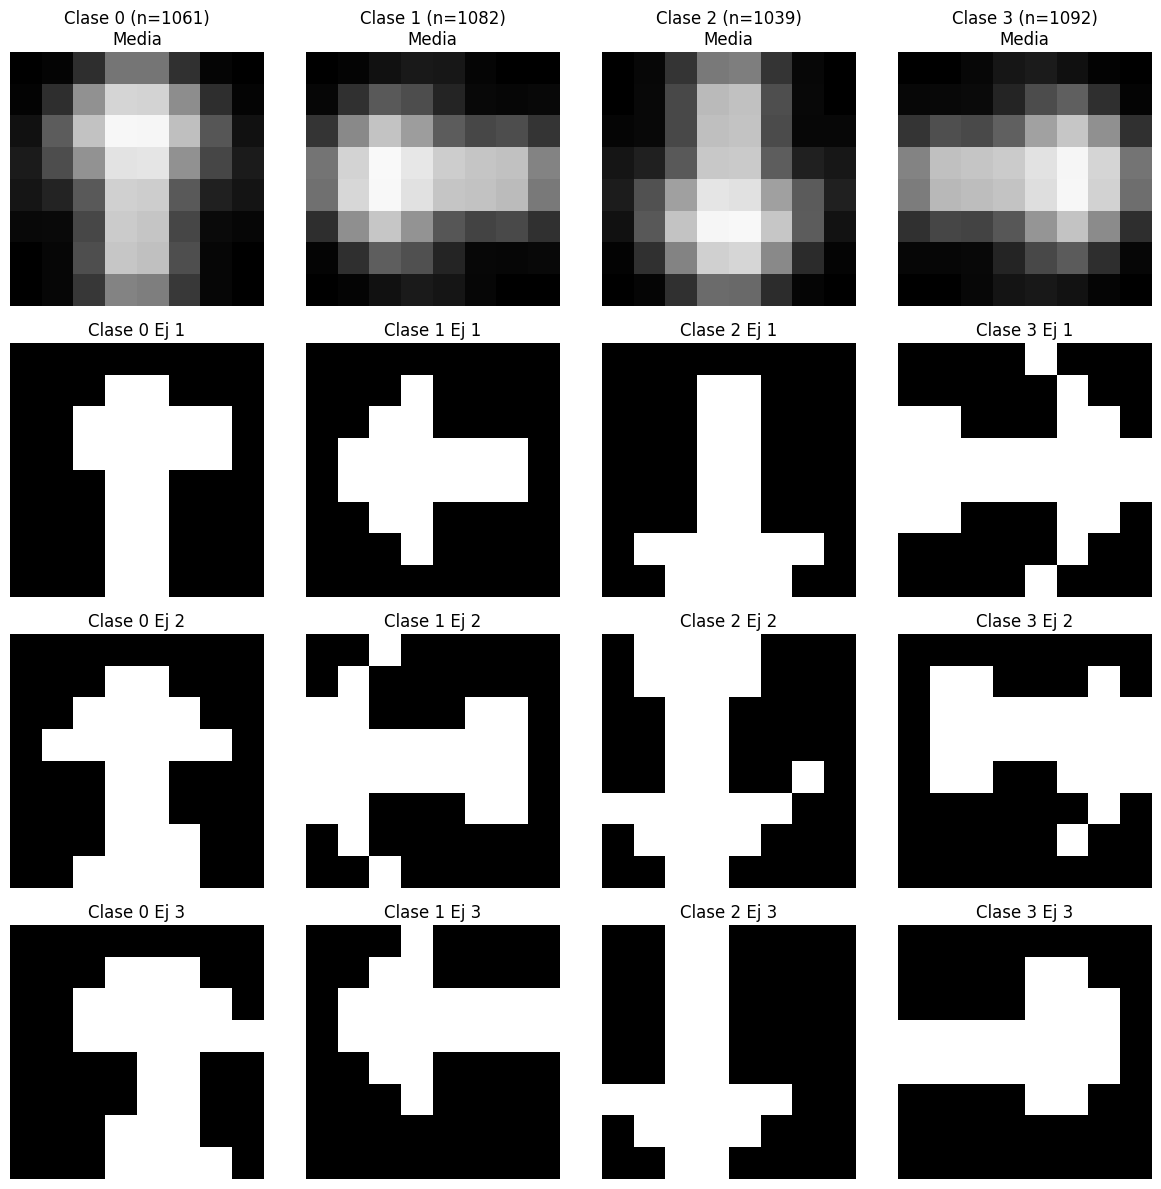

In [ ]:
# Descripción general de los datos de entrenamiento (usa variables ya cargadas)

# Resumen tabular de X_train
print("X_train shape:", X_train.shape)
print("\nX_train.describe():")
print(X_train.describe())

# Tipos y uso de memoria
print("\nDtypes count:")
print(X_train.dtypes.value_counts())

# Distribución de clases
print("\nDistribución de clases (y_train):")
print(y_train.value_counts().sort_index())
print("\nDistribución relativa:")
print(y_train.value_counts(normalize=True).sort_index())

# Estadísticas de las entradas binarias (sparsity)
frac_ones = x_train_flat.mean()  # proporción de píxeles=1 en todo el set de entrenamiento
print(f"\nProporción de píxeles activados en x_train (media global): {frac_ones:.4f}")

# Mostrar imagen media por clase y hasta 3 ejemplos por clase
labels = sorted(y_train.unique())
rows = 4  # fila 0 = media, filas 1-3 = ejemplos
cols = len(labels)

fig, axs = plt.subplots(rows, cols, figsize=(3*cols, 3*rows))
for i, lbl in enumerate(labels):
    mask = (y_train.values == lbl)
    imgs = x_train[mask]  # shape (n,8,8,1)
    count = imgs.shape[0]

    # imagen media de la clase
    mean_img = imgs.mean(axis=0).squeeze()
    ax = axs[0, i] if rows > 1 else axs[i]
    ax.imshow(mean_img, cmap='gray', vmin=0, vmax=1)
    ax.set_title(f"Clase {lbl} (n={count})\nMedia")
    ax.axis('off')

    # hasta 3 ejemplos
    for j in range(3):
        ax = axs[j+1, i]
        if j < imgs.shape[0]:
            ax.imshow(imgs[j].squeeze(), cmap='gray', vmin=0, vmax=1)
            ax.set_title(f"Clase {lbl} Ej {j+1}")
        else:
            ax.axis('off')
        ax.axis('off')

plt.tight_layout()
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_19796\395006416.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette='viridis', ax=ax)


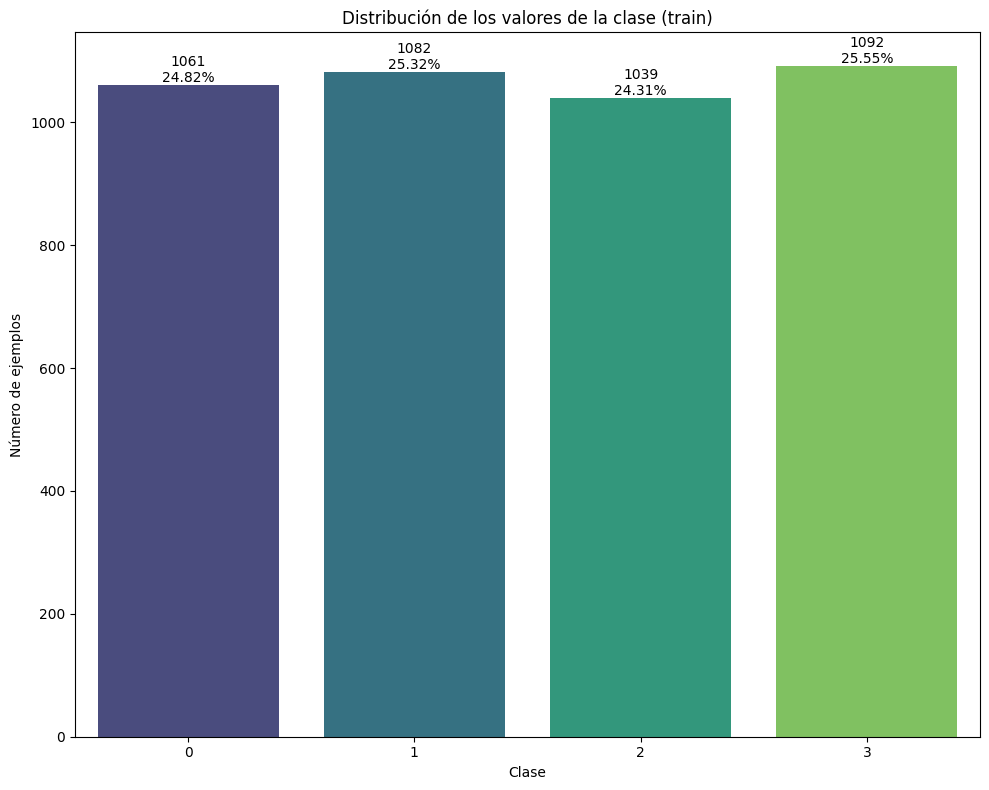

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
sns.countplot(x=y_train, palette='viridis', ax=ax)
ax.set_title("Distribución de los valores de la clase (train)")
ax.set_xlabel("Clase")
ax.set_ylabel("Número de ejemplos")

total = len(y_train)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{int(height)}\n{height/total*100:.2f}%", 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


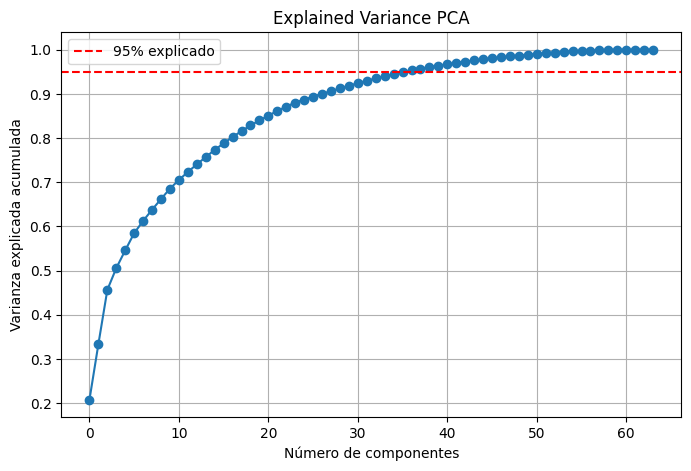

Componentes necesarios para 95% de varianza: 37


In [ ]:
from sklearn.decomposition import PCA

# PCA sobre X_train (DataFrame)
pca = PCA()
X_train_PCA_array = pca.fit_transform(X_train)

# Varianza explicada acumulada y plot
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 5))
plt.plot(cumsum, marker='o')
plt.axhline(0.95, color='red', linestyle='--', label='95% explicado')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.title('Explained Variance PCA')
plt.grid(True)
plt.legend()
plt.show()

# Opcional: número mínimo de componentes para explicar 95% de la varianza
n_comp_95 = np.searchsorted(cumsum, 0.95) + 1
print(f"Componentes necesarios para 95% de varianza: {n_comp_95}")

# Guardar resultado en DataFrame usando el índice de entrenamiento existente
X_train_PCA = pd.DataFrame(data=X_train_PCA_array, index=train_index)

Componentes disponibles en el PCA: 64
Varianza explicada por los 64 componentes disponibles: 1.000000 (100.00%)
Varianza explicada por 1000 componentes (padding if needed): 1.000000 (100.00%)

Componentes necesarios para alcanzar 90%: 27
Componentes necesarios para alcanzar 95%: 37
Componentes necesarios para alcanzar 99%: 51


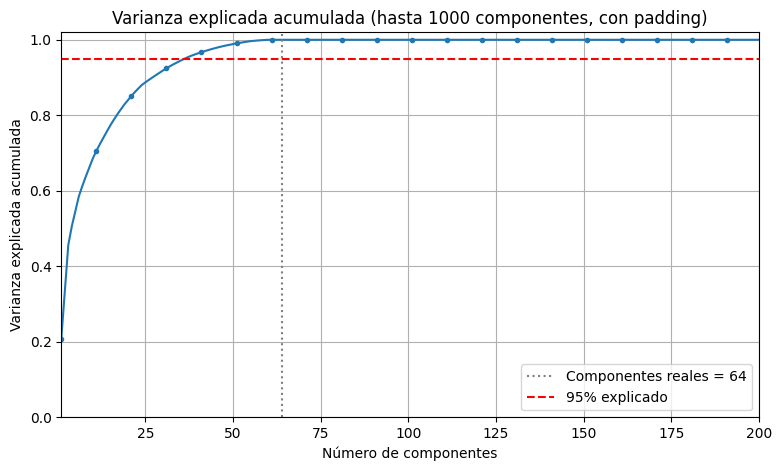

In [ ]:
# Análisis de varianza considerando "800 componentes" usando el PCA ya ajustado.
# (Si el PCA solo tiene <784 componentes, las componentes adicionales aportan 0 varianza.)

avail = len(pca.explained_variance_ratio_)      # componentes realmente disponibles
explained = pca.explained_variance_ratio_
total_avail = explained.sum()
target = 1000

# padding con ceros hasta 784 (si procede)
explained_padded = np.pad(explained, (0, max(0, target - avail)), 'constant', constant_values=0.0)
total_784 = explained_padded.sum()

print(f"Componentes disponibles en el PCA: {avail}")
print(f"Varianza explicada por los {avail} componentes disponibles: {total_avail:.6f} ({total_avail*100:.2f}%)")
print(f"Varianza explicada por {target} componentes (padding if needed): {total_784:.6f} ({total_784*100:.2f}%)\n")

# Número de componentes necesarios para varios umbrales (usando el vector padded)
cumsum_padded = np.cumsum(explained_padded)

def comps_for_threshold(th):
    idx = np.searchsorted(cumsum_padded, th) + 1
    return idx if idx <= target else None

for thresh in (0.90, 0.95, 0.99):
    idx = comps_for_threshold(thresh)
    if idx is None:
        print(f"No se alcanza {int(thresh*100)}% con {target} componentes.")
    else:
        print(f"Componentes necesarios para alcanzar {int(thresh*100)}%: {idx}")

# Visualización: varianza explicada acumulada (mostramos hasta las primeras 200 componentes para claridad)
plt.figure(figsize=(9,5))
x = np.arange(1, target+1)
plt.plot(x, cumsum_padded, marker='.', markevery=max(1, target//100))
plt.axvline(avail, color='gray', linestyle=':', label=f'Componentes reales = {avail}')
plt.axhline(0.95, color='red', linestyle='--', label='95% explicado')
plt.xlim(1, min(200, target))
plt.ylim(0, 1.02)
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.title(f'Varianza explicada acumulada (hasta {target} componentes, con padding)')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Porcentaje de varianza capturada por los primeros K componentes (usa pca ya ajustado)
importanceOfPrincipalComponents = pd.DataFrame(data=pca.explained_variance_ratio_).T

avail = importanceOfPrincipalComponents.shape[1]
for k in (20, 50, 100, 200, 300):
    used = min(k, avail)
    var_sum = importanceOfPrincipalComponents.loc[:, 0:used-1].sum(axis=1).values[0]
    if k > avail:
        print(f"Varianza capturada por los primeros {k} componentes (solo {avail} disponibles): "
              f"{var_sum:.6f} ({var_sum*100:.2f}%)")
    else:
        print(f"Varianza capturada por los primeros {k} componentes: {var_sum:.6f} ({var_sum*100:.2f}%)")

Varianza capturada por los primeros 20 componentes: 0.839884 (83.99%)
Varianza capturada por los primeros 50 componentes: 0.988639 (98.86%)
Varianza capturada por los primeros 100 componentes (solo 64 disponibles): 1.000000 (100.00%)
Varianza capturada por los primeros 200 componentes (solo 64 disponibles): 1.000000 (100.00%)
Varianza capturada por los primeros 300 componentes (solo 64 disponibles): 1.000000 (100.00%)


In [ ]:
def scatter_plot(xDF, yDF, algoName, col1=0, col2=1, annotate=False):
    """
    Dibujar scatter de dos columnas (col1, col2) de xDF coloreado por yDF.
    Retorna (fig, ax). No reimporta módulos (usa los ya disponibles en el notebook).
    """
    # Asegurar DataFrame de características
    if isinstance(xDF, pd.DataFrame):
        xdf = xDF
    else:
        arr = np.asarray(xDF)
        if arr.ndim > 2:
            arr = arr.reshape((arr.shape[0], -1))
        # usar índice si existe en xDF, si no, None -> pandas asigna RangeIndex
        idx = getattr(xDF, "index", None) if hasattr(xDF, "index") else None
        xdf = pd.DataFrame(arr, index=idx)

    n_feat = xdf.shape[1]
    if not (0 <= col1 < n_feat and 0 <= col2 < n_feat):
        raise ValueError(f"Column indices fuera de rango: X tiene {n_feat} columnas (0..{n_feat-1})")

    # Preparar DataFrame temporal alineado con yDF
    tempDF = pd.DataFrame(data=xdf.loc[:, [col1, col2]], index=xdf.index).copy()
    # Asegurar que yDF sea Series con mismo índice o alineable
    if isinstance(yDF, pd.Series):
        yser = yDF
    else:
        yser = pd.Series(yDF, index=tempDF.index, name="Label")

    tempDF = pd.concat((tempDF, yser), axis=1, join="inner")
    v1 = f"Vector_{col1}"
    v2 = f"Vector_{col2}"
    tempDF.columns = [v1, v2, "Label"]

    # Plot
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.scatterplot(x=v1, y=v2, hue="Label", data=tempDF, palette="viridis", ax=ax, s=40, alpha=0.85)
    ax.set_title("Separation of Observations using " + str(algoName))
    ax.set_xlabel(v1)
    ax.set_ylabel(v2)
    ax.grid(True)

    # Opcional: anotar centroides por clase (si requested)
    if annotate:
        centroids = tempDF.groupby("Label")[[v1, v2]].mean()
        for lbl, row in centroids.iterrows():
            ax.annotate(str(int(lbl)), xy=(row[v1], row[v2]),
                        xytext=(5, 5), textcoords='offset points',
                        fontsize=11, fontweight='bold',
                        bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.8))

    plt.tight_layout()
    return fig, ax

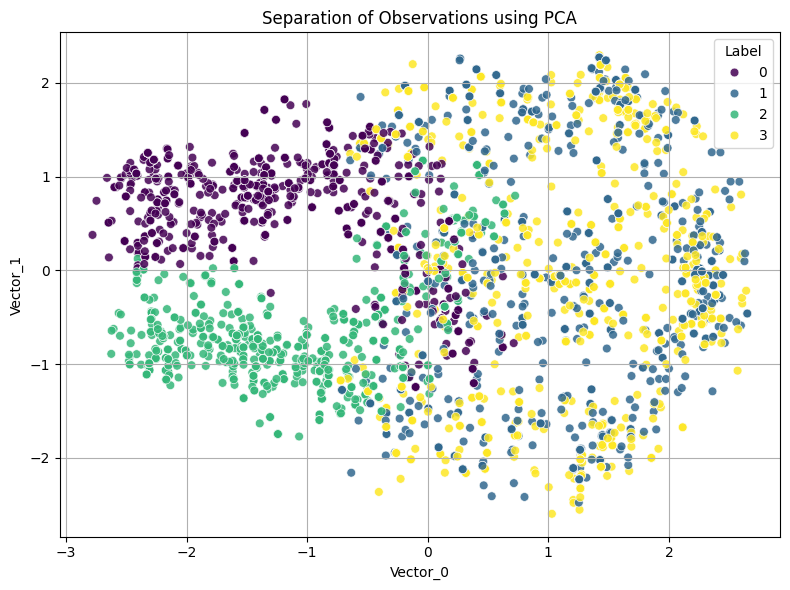

In [ ]:
fig, ax = scatter_plot(X_train_PCA, y_train, "PCA", col1=0, col2=1) 

Columnas solicitadas (500, 600) fuera de rango. X_train tiene 64 columnas (índices 0..63).
Usando X_train_PCA (componentes 0 y 1) como fallback.


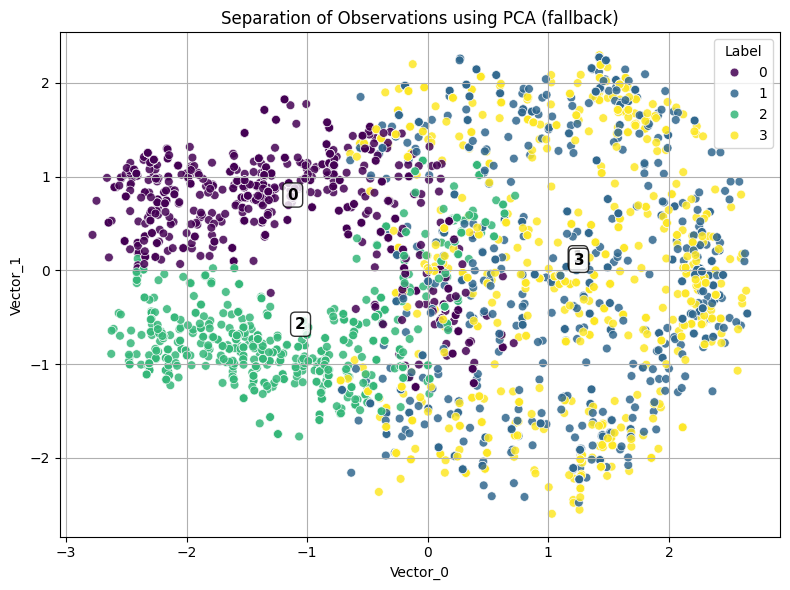

In [ ]:
# Intento de dibujar scatter con las columnas solicitadas (usar variables ya existentes)
col1, col2 = 200, 300

# Asegurar X_train como DataFrame (no reimportar pandas; ya está disponible en el notebook)
if isinstance(X_train, pd.DataFrame):
    xdf = X_train
else:
    # convertir ndarray a DataFrame (mantener filas/índices)
    xdf = pd.DataFrame(X_train.reshape((X_train.shape[0], -1)))

n_feat = xdf.shape[1]

if col1 < n_feat and col2 < n_feat:
    # columnas válidas: ejecutar directamente
    scatter_plot(xdf, y_train, "Original Features", col1, col2)
else:
    # columnas fuera de rango: informar y hacer fallback razonable
    print(f"Columnas solicitadas ({col1}, {col2}) fuera de rango. X_train tiene {n_feat} columnas (índices 0..{n_feat-1}).")
    # Si existe representación PCA con >=2 componentes, usarla como fallback
    if 'X_train_PCA' in globals() and isinstance(X_train_PCA, pd.DataFrame) and X_train_PCA.shape[1] >= 2:
        print("Usando X_train_PCA (componentes 0 y 1) como fallback.")
        scatter_plot(X_train_PCA, y_train, "PCA (fallback)", 0, 1, annotate=True)
    else:
        print("No existe X_train_PCA útil. Usando las primeras dos columnas de X_train como fallback.")
        scatter_plot(xdf, y_train, "Original Features (first 2)", 0, 1, annotate=True)

In [ ]:
# Asegúrate de que el DataFrame diabetes esté definido
# Aquí se asume que diabetes ya contiene la columna 'Outcome'

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
sns.countplot(x='Outcome', data=diabetes, palette='viridis', ax=ax)
ax.set_title("Outcome Count")
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined